# Credit Card Approval Prediction

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this workbook, you will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

### The Data

The data is a small subset of the Credit Card Approval dataset from the UCI Machine Learning Repository showing the credit card applications a bank receives. This dataset has been loaded as a `pandas` DataFrame called `cc_apps`. The last column in the dataset is the target value.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from scikeras.wrappers import KerasClassifier

In [ ]:
# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None)
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,+


## **Data Inspection**


In [ ]:
cc_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    int64  
 13  13      690 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 75.6+ KB


In [ ]:
cc_apps.describe()

,2,7,10,12
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
# Getting the number of unique values per column
cc_apps.nunique()

,0
0,3
1,350
2,215
3,4
4,4
5,15
6,10
7,132
8,2
9,2


In [ ]:
# # Getting unique values per column to check for any inconsistencies

# Print value counts for each column
for column in cc_apps.columns:
  print(f"Value counts for column {column}:")
  print(cc_apps[column].value_counts())
  print("-" * 20)

Value counts for column 0:
0
b    468
a    210
?     12
Name: count, dtype: int64
--------------------
Value counts for column 1:
1
?        12
22.67     9
20.42     7
25.00     6
20.67     6
         ..
30.33     1
47.17     1
25.83     1
50.25     1
36.42     1
Name: count, Length: 350, dtype: int64
--------------------
Value counts for column 2:
2
1.500     21
2.500     19
0.000     19
3.000     19
0.750     16
          ..
12.835     1
7.250      1
10.210     1
10.085     1
3.375      1
Name: count, Length: 215, dtype: int64
--------------------
Value counts for column 3:
3
u    519
y    163
?      6
l      2
Name: count, dtype: int64
--------------------
Value counts for column 4:
4
g     519
p     163
?       6
gg      2
Name: count, dtype: int64
--------------------
Value counts for column 5:
5
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: count, dtype: int64
-----------


Analyzing column: '0'

Missing values in '0': 0
Number of duplicate '0' entries: 687
Number of unique '0': 3
All unique values with counts in '0':
0
b    468
a    210
?     12
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


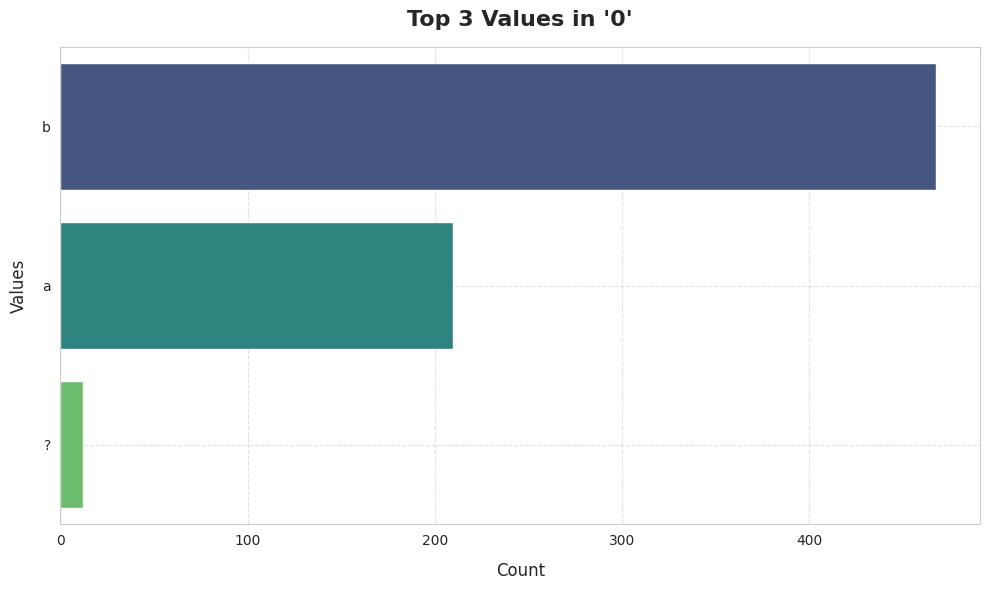





Analyzing column: '1'

Missing values in '1': 0
Number of duplicate '1' entries: 340
Number of unique '1': 350
Top 5 most common values in '1':
1
?        12
22.67     9
20.42     7
25.00     6
20.67     6
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


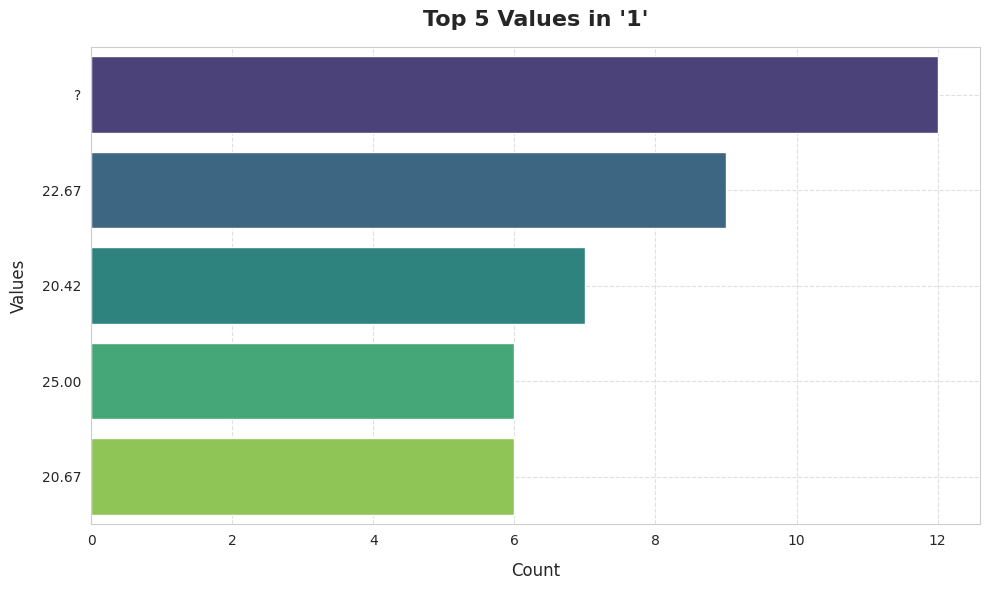





Analyzing column: '2'

Missing values in '2': 0
Number of duplicate '2' entries: 475
Number of unique '2': 215
Distribution of '2':
count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: 2, dtype: float64



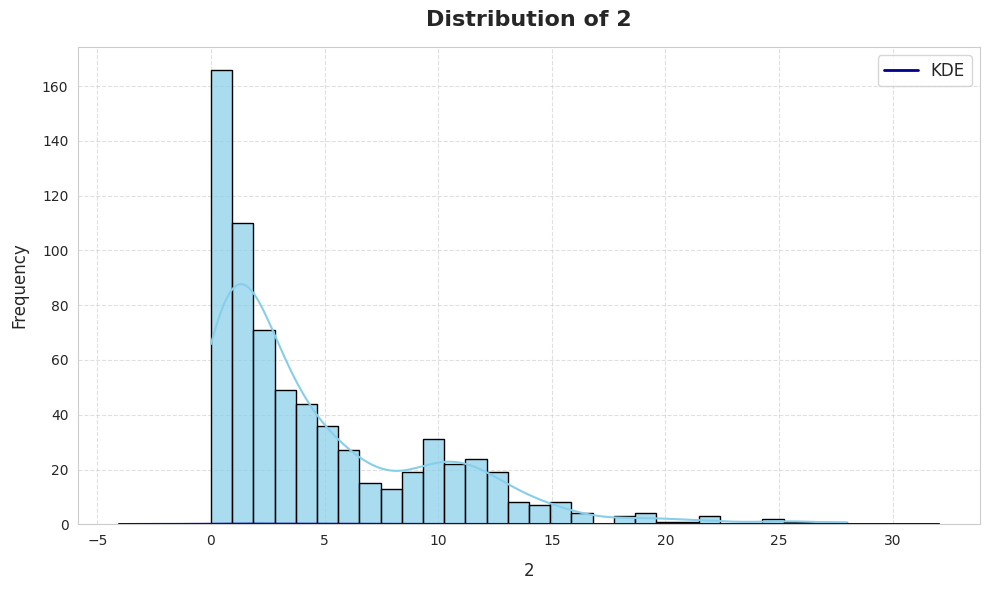

Outliers in '2': 17 entries
Sample outliers:
27     18.500
44     28.000
69     25.125
80     19.000
183    19.500
234    21.000
241    25.085
250    21.500
305    26.335
317    22.000
Name: 2, dtype: float64

IQR lower bound: -8.31125, upper bound: 16.518749999999997



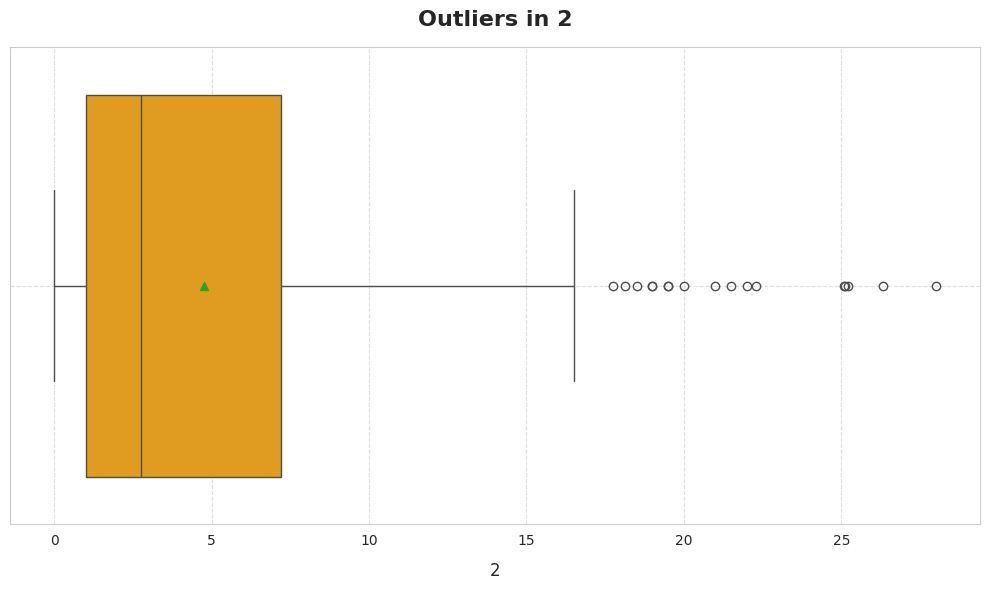





Analyzing column: '3'

Missing values in '3': 0
Number of duplicate '3' entries: 686
Number of unique '3': 4
All unique values with counts in '3':
3
u    519
y    163
?      6
l      2
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


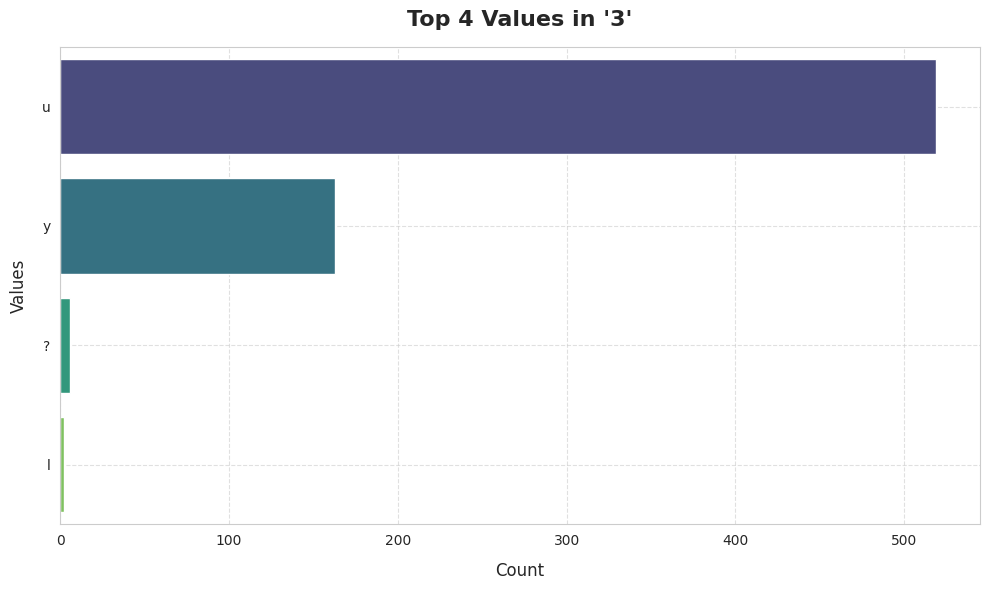





Analyzing column: '4'

Missing values in '4': 0
Number of duplicate '4' entries: 686
Number of unique '4': 4
All unique values with counts in '4':
4
g     519
p     163
?       6
gg      2
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


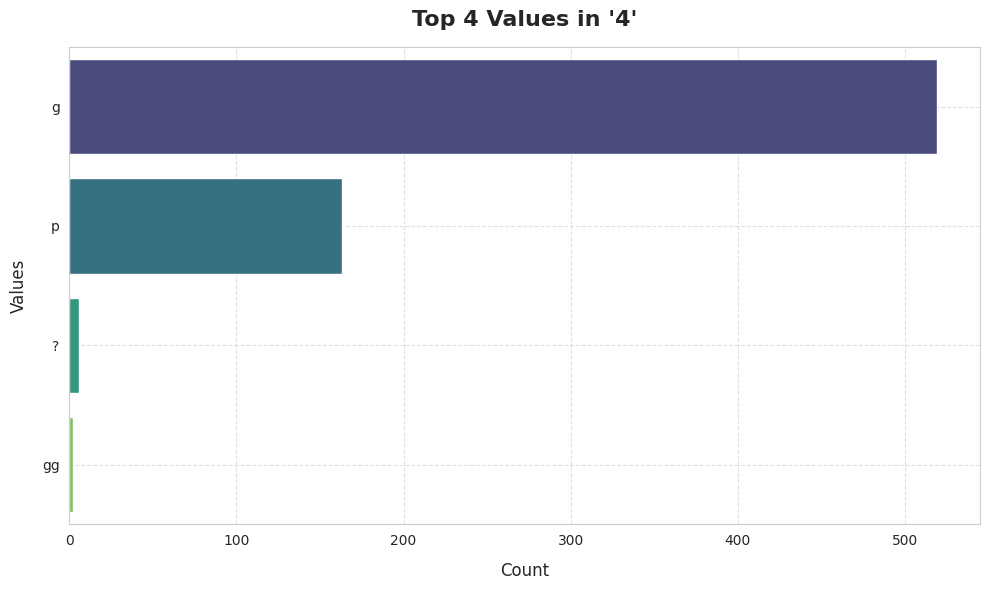

<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(






Analyzing column: '5'

Missing values in '5': 0
Number of duplicate '5' entries: 675
Number of unique '5': 15
Top 5 most common values in '5':
5
c     137
q      78
w      64
i      59
aa     54
Name: count, dtype: int64



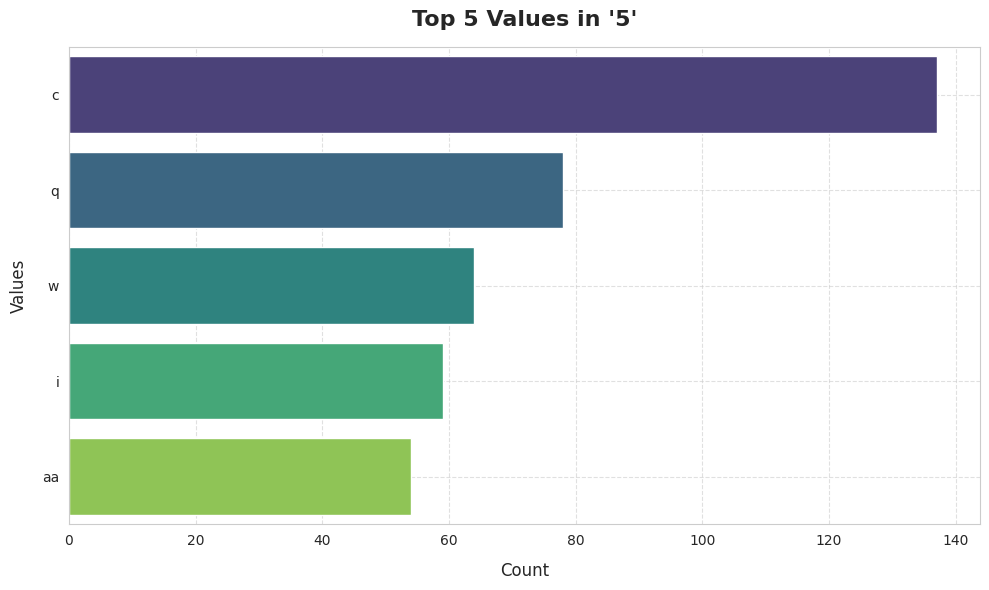





Analyzing column: '6'

Missing values in '6': 0
Number of duplicate '6' entries: 680
Number of unique '6': 10
All unique values with counts in '6':
6
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


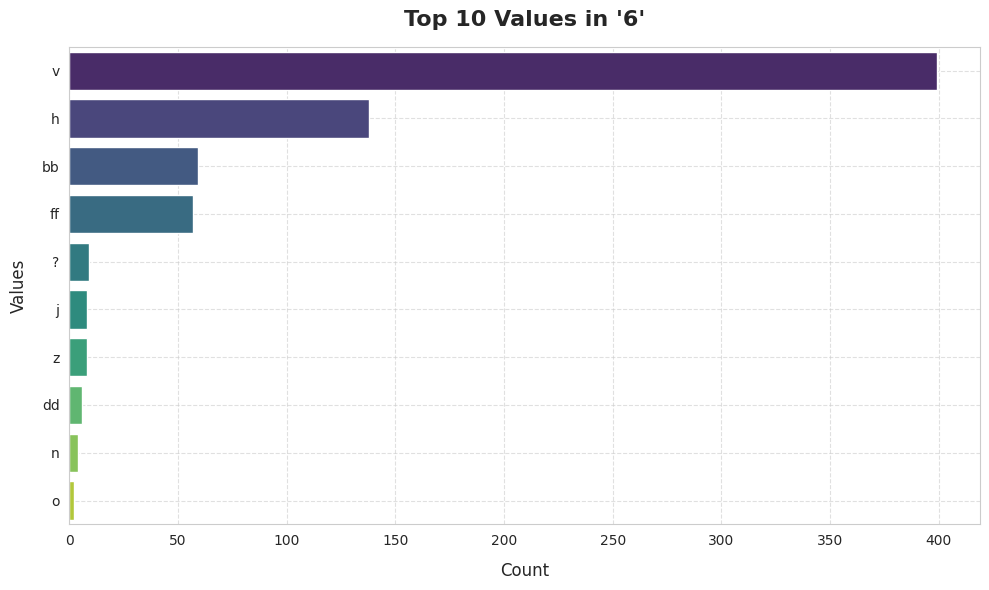





Analyzing column: '7'

Missing values in '7': 0
Number of duplicate '7' entries: 558
Number of unique '7': 132
Distribution of '7':
count    690.000000
mean       2.223406
std        3.346513
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: 7, dtype: float64



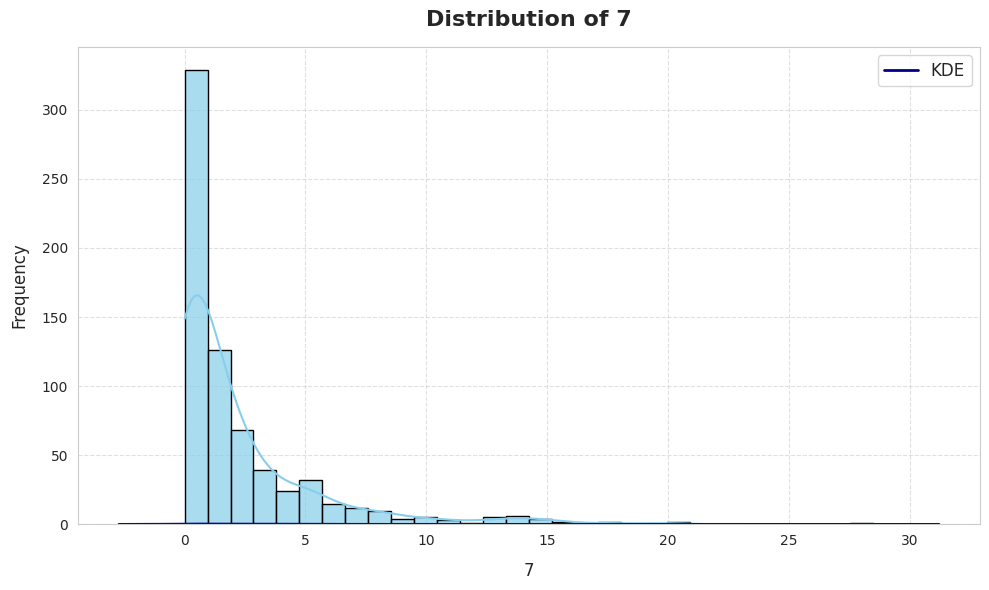

Outliers in '7': 63 entries
Sample outliers:
6      6.500
22     7.875
27    15.000
28     7.000
31     7.960
32     7.585
39    14.415
43     8.625
44    28.500
54     7.415
Name: 7, dtype: float64

IQR lower bound: -3.525, upper bound: 6.3149999999999995



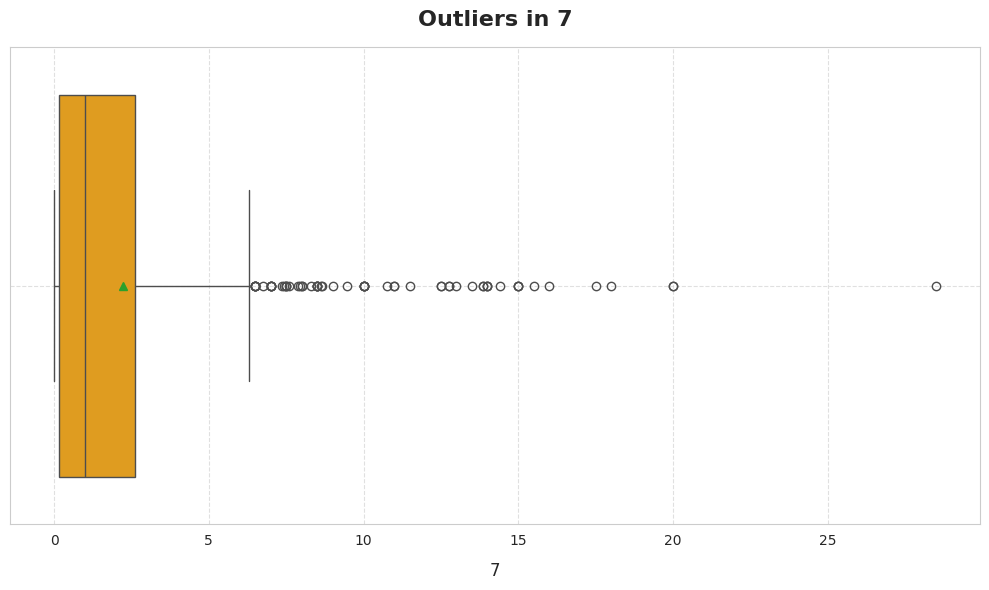





Analyzing column: '8'

Missing values in '8': 0
Number of duplicate '8' entries: 688
Number of unique '8': 2
All unique values with counts in '8':
8
t    361
f    329
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


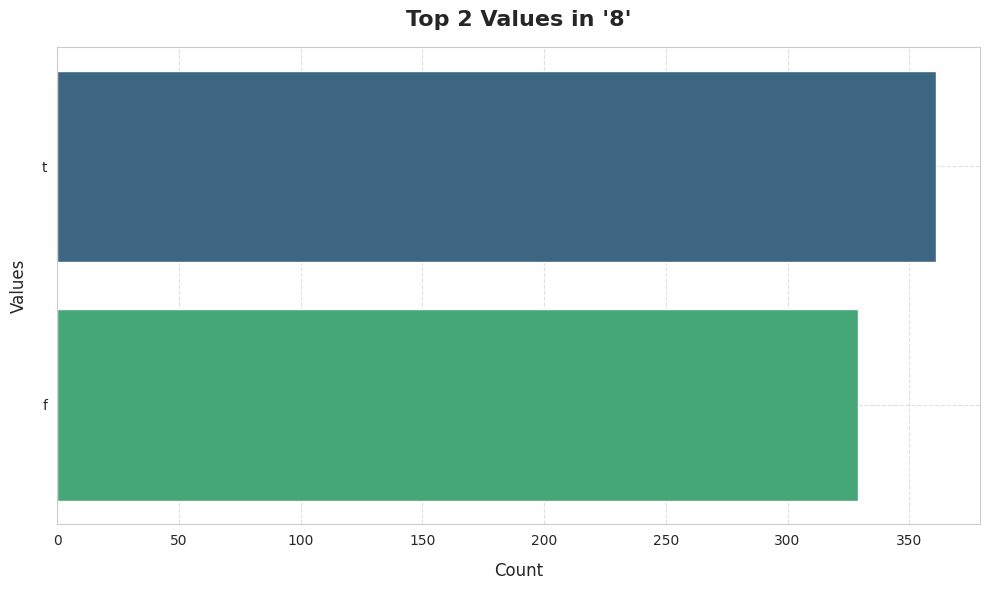





Analyzing column: '9'

Missing values in '9': 0
Number of duplicate '9' entries: 688
Number of unique '9': 2
All unique values with counts in '9':
9
f    395
t    295
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


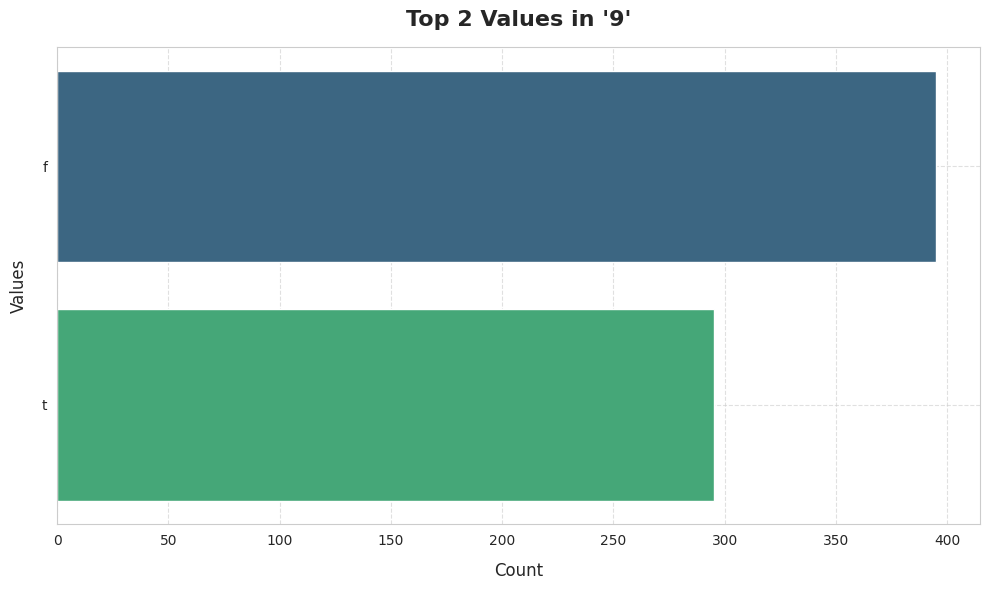





Analyzing column: '10'

Missing values in '10': 0
Number of duplicate '10' entries: 667
Number of unique '10': 23
Distribution of '10':
count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000
Name: 10, dtype: float64



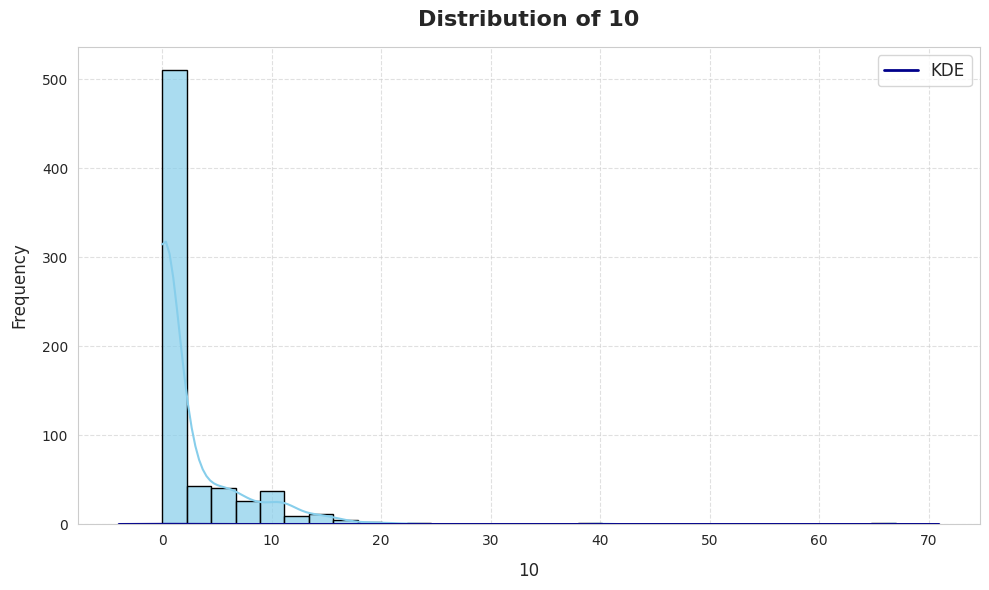

Outliers in '10': 79 entries
Sample outliers:
15    10
17    10
20    17
26     9
27    17
31     8
32    15
35    11
36    12
39    11
Name: 10, dtype: int64

IQR lower bound: -4.5, upper bound: 7.5



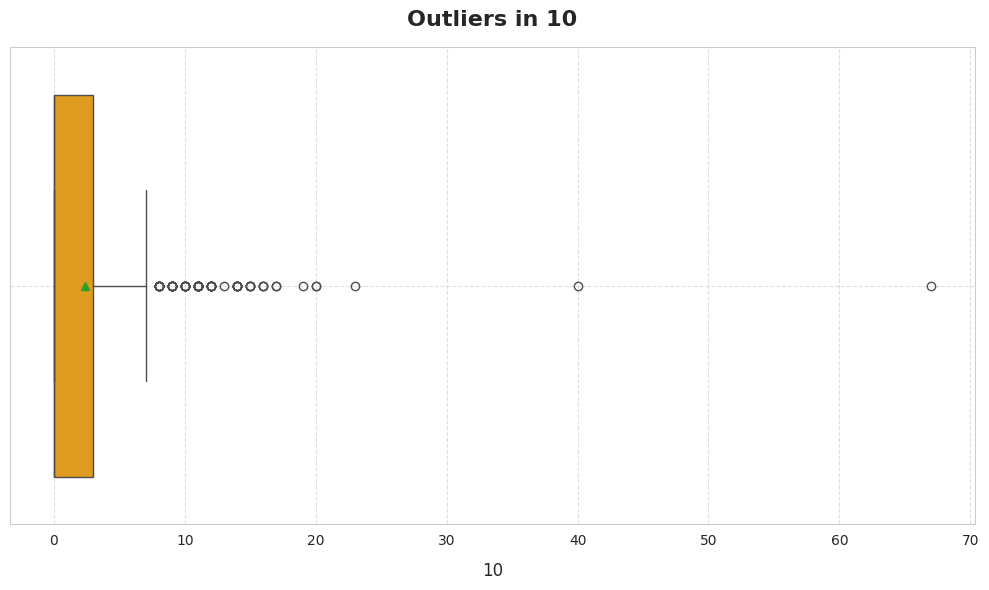





Analyzing column: '11'

Missing values in '11': 0
Number of duplicate '11' entries: 687
Number of unique '11': 3
All unique values with counts in '11':
11
g    625
s     57
p      8
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


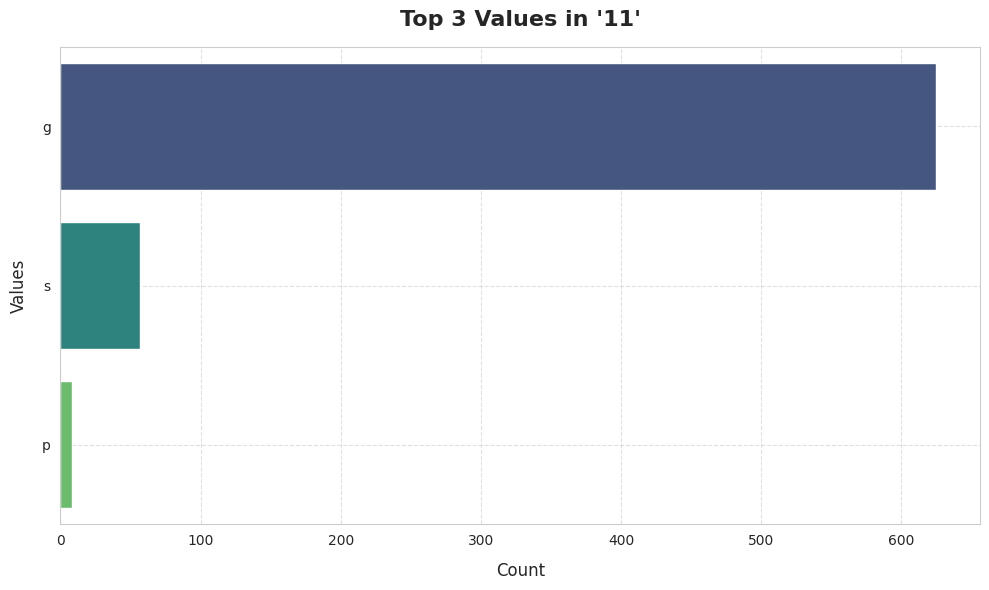





Analyzing column: '12'

Missing values in '12': 0
Number of duplicate '12' entries: 450
Number of unique '12': 240
Distribution of '12':
count       690.000000
mean       1017.385507
std        5210.102598
min           0.000000
25%           0.000000
50%           5.000000
75%         395.500000
max      100000.000000
Name: 12, dtype: float64



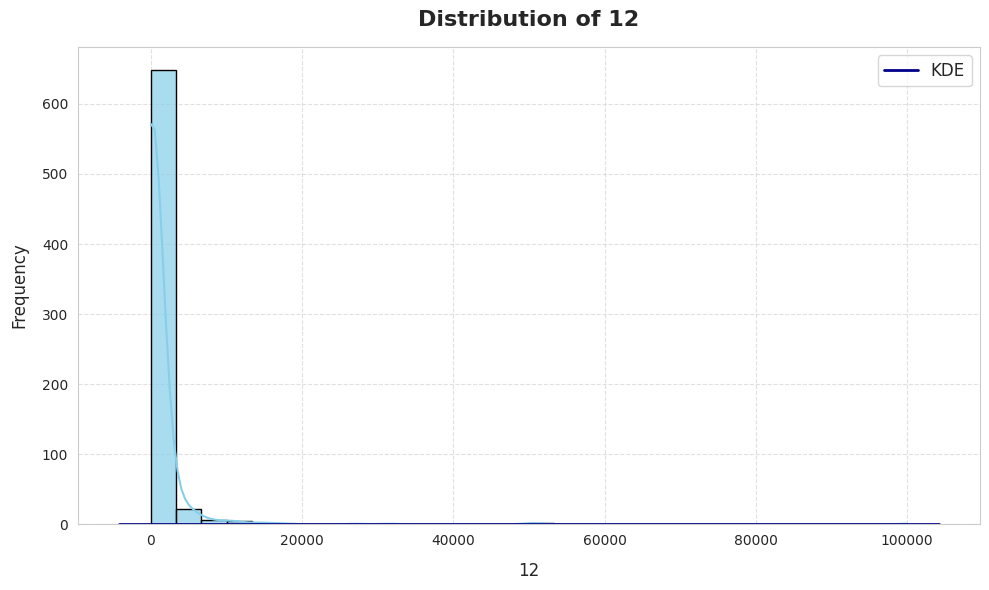

Outliers in '12': 113 entries
Sample outliers:
6     31285
7      1349
9      1442
13     2690
20     1208
22     1260
29    10000
32     5000
33     4000
41     2283
Name: 12, dtype: int64

IQR lower bound: -593.25, upper bound: 988.75



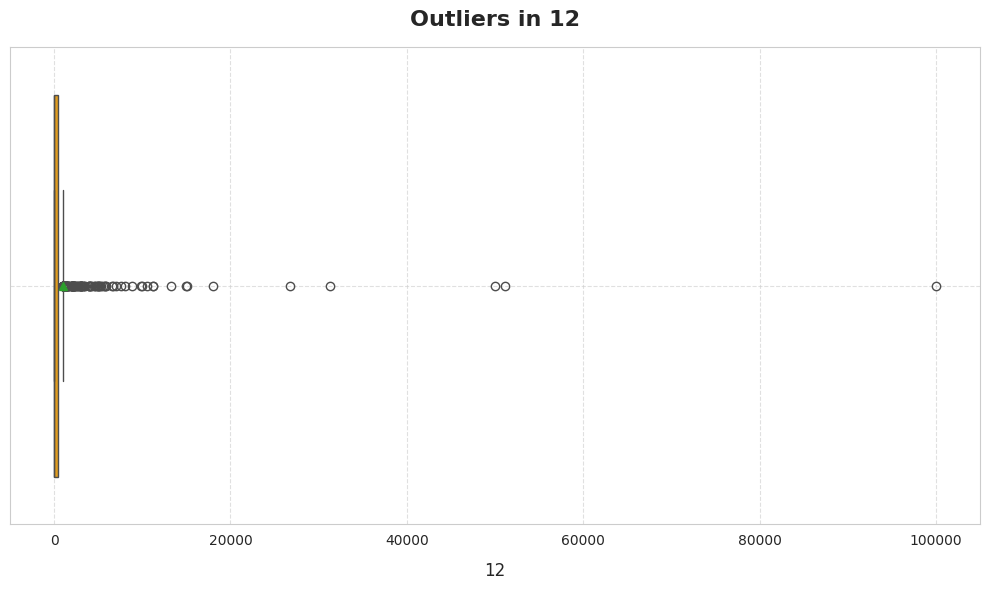





Analyzing column: '13'

Missing values in '13': 0
Number of duplicate '13' entries: 688
Number of unique '13': 2
All unique values with counts in '13':
13
-    383
+    307
Name: count, dtype: int64



<ipython-input-11-e6321a4db55f>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


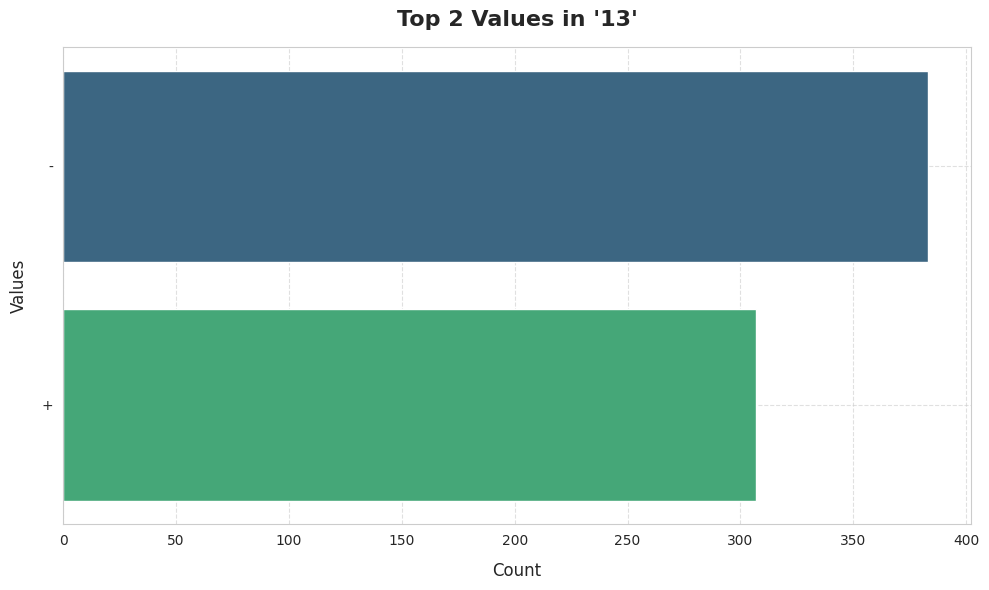






                          SUMMARY

No missing values found in any column.

No completely unique columns found.


In [ ]:
def analyze_all_columns(df):
    sns.set_style("whitegrid")
    missing_summary = {}
    unique_summary = []

    for column_name in df.columns:
        print(f"\n{'=' * 60}")
        print(f"Analyzing column: '{column_name}'")
        print(f"{'=' * 60}\n")

        # Missing Values
        missing_values = df[column_name].isnull().sum()

        if missing_values > 0:
            missing_summary[column_name] = missing_values

        print(f"Missing values in '{column_name}': {missing_values}")

        # Duplicates
        duplicates = df.duplicated(subset=[column_name]).sum()
        print(f"Number of duplicate '{column_name}' entries: {duplicates}")

        # Unique Values
        unique_values = df[column_name].nunique()
        print(f"Number of unique '{column_name}': {unique_values}")

        if unique_values == len(df):
            unique_summary.append(column_name)
            print(f"'{column_name}' is completely unique; skipping further analysis.")
        else:
            if df[column_name].dtype in ['object', 'category', 'bool']:
                value_counts = df[column_name].value_counts()

                if unique_values <= 13:
                    print(f"All unique values with counts in '{column_name}':\n{value_counts}\n")
                    top_categories = value_counts.index
                else:
                    print(f"Top 5 most common values in '{column_name}':\n{value_counts.head(5)}\n")
                    top_categories = value_counts.index[:5]

                # - Unique Values Visualization
                if df[column_name].dtype != 'bool':
                  plt.figure(figsize=(10, 6))
                  sns.barplot(
                      x=value_counts.loc[top_categories].values,
                      y=top_categories,
                      palette="viridis",
                  )
                  plt.title(f"Top {len(top_categories)} Values in '{column_name}'", fontsize=16, fontweight='bold', pad=15)
                  plt.xlabel("Count", fontsize=12, labelpad=10)
                  plt.ylabel("Values", fontsize=12, labelpad=10)
                  plt.grid(True, linestyle='--', alpha=0.6)
                  plt.tight_layout()
                  plt.show()
            else:

                # Numerical Column Distribution
                print(f"Distribution of '{column_name}':\n{df[column_name].describe()}\n")

                # - Distribution Visualization
                plt.figure(figsize=(10, 6))
                sns.histplot(df[column_name].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
                sns.kdeplot(df[column_name].dropna(), color='darkblue', linewidth=2, label='KDE')

                plt.title(f"Distribution of {column_name}", fontsize=16, fontweight='bold', pad=15)
                plt.xlabel(column_name, fontsize=12, labelpad=10)
                plt.ylabel("Frequency", fontsize=12, labelpad=10)
                plt.legend(fontsize=12)
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.show()

                # Outlier Detection
                Q1 = df[column_name].quantile(0.25)
                Q3 = df[column_name].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)][column_name]
                print(f"Outliers in '{column_name}': {len(outliers)} entries")
                if len(outliers) > 0:
                    print(f"Sample outliers:\n{outliers.head(10)}\n")
                print(f"IQR lower bound: {lower_bound}, upper bound: {upper_bound}\n")

                # - Outlier Visualization
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=df[column_name], color='orange', showmeans=True)
                plt.title(f"Outliers in {column_name}", fontsize=16, fontweight='bold', pad=15)
                plt.xlabel(column_name, fontsize=12, labelpad=10)
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.tight_layout()
                plt.show()

        print("\n\n")

    print(f"\n\n{'=' * 60}")
    print(f"{' ' * 25} SUMMARY")
    print(f"{'=' * 60}\n")

    # Summary of columns with missing values
    if missing_summary:
        print("Summary of columns with missing values:")
        print("-" * 40)
        for col, missing_count in missing_summary.items():
            print(f"Column: {col}, Missing Values: {missing_count}")
    else:
        print("No missing values found in any column.")

    # Summary of completely unique columns
    if unique_summary:
        print("\nSummary of completely unique columns:")
        print("-" * 40)
        for col in unique_summary:
            print(f"Column: {col} is completely unique.")
    else:
        print("\nNo completely unique columns found.")


analyze_all_columns(cc_apps)

## Dealing With Missing Values

Based on the above, we discovered that some columns have missing values indicated by "?" thus we will replace "?" with NA to be able to handle these missing values

In [ ]:
cc_apps=cc_apps.replace('?',np.nan)

#Getting the percentage of missing values per column
cc_apps.isna().sum()/cc_apps.shape[0] *100

In [ ]:
# Print all rows that have at least one null value
print(cc_apps[cc_apps.isnull().any(axis=1)])
print("------------------------------------------")
print(cc_apps[cc_apps.isnull().any(axis=1)].shape)


In [ ]:
#Since it the missing values are less than 0.01% of the data size then its most probably its considered MCAR so we decided to drop the null values
cc_apps.dropna(inplace=True)

In [ ]:
# To ensure nulls were dropped
print (cc_apps.isna().sum())
print("------------------------------------------")
cc_apps.shape

## Data Exploration & Visualisation

In [ ]:
# Checking correlations between numerical columns
numerical_cols = cc_apps.select_dtypes(include=np.number).columns

correlation_matrix = cc_apps[numerical_cols].corr()
correlation_matrix


In [ ]:
categorical_cols = cc_apps.select_dtypes(exclude=np.number).columns

if len(cc_apps.columns) > 0:
    categorical_cols = categorical_cols.drop(cc_apps.columns[-1])

# Perform chi-square test for each pair of categorical features
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        contingency_table = pd.crosstab(cc_apps[col1], cc_apps[col2])
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        print(f"Chi-square test between {col1} and {col2}:")
        print(f"Chi2 statistic: {chi2}")
        print(f"P-value: {p}")
        print(f"Degrees of freedom: {dof}")
        print("-" * 20)


In [ ]:
# Encoding categorical columns to be able to visualise correlations of all columns


# Creating a temporary copy of the DataFrame
temp_df = cc_apps.copy()

# Encoding categorical features using Label Encoding
categorical_cols = temp_df.select_dtypes(exclude=np.number).columns
label_encoder = preprocessing.LabelEncoder()

# Applying Label Encoding to each categorical column
for col in categorical_cols:
    temp_df[col] = label_encoder.fit_transform(temp_df[col]) # Iterate through categorical columns and encode them individually

# Calculate the correlation matrix
correlation_matrix = temp_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on the heat map, we discovered that column 0 & 6 have very low correltaions to the target/output column thus we decided to drop these columns

In [ ]:
cc_apps = cc_apps.drop([0, 6], axis=1) # not correlated with dependent variable at all 0, 0.02

# Manually encoding the target value since the algorithms deal with numeric data only
cc_apps=cc_apps.replace('+',1)
cc_apps=cc_apps.replace('-',0)
cc_apps.head()

## Encoding Data
We decided to drop the target value before encoding to avoid data leakage

Raw Data → Train/Test Split → Fit encoder on Train → Transform Train and Test

In [ ]:
X = cc_apps.drop(columns=[13])  # Assuming 13 is the target variable column
y = cc_apps[13]

In [ ]:
one_hot_columns = [3, 4, 8,9,11]
X = pd.get_dummies(X, columns=one_hot_columns)

X.head()

## Splitting the data for modeling

In [ ]:
# Assuming `X` is your feature set and `y` is the target variable (binary '-' and '+')
# Stratified split to ensure the distribution of the classes in the target column is maintained

# First split 70% for training and 30% for validation + test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Now split the remaining 30% (which is X_temp, y_temp) into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Now we have:
# X_train, y_train -> 70% of the data
# X_val, y_val -> 15% of the data
# X_test, y_test -> 15% of the data



In [ ]:
# Define OrdinalEncoder with handling for unknown categories
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Define your columns to encode (assuming column indices 1 and 5 are categorical)
columns_to_encode = [1, 5]

# Encode training data first
for col in columns_to_encode:
    # Fit the encoder on training data only
    ordinal_encoder.fit(X_train[[col]])

    # Transform training data
    X_train[col] = ordinal_encoder.transform(X_train[[col]])

    # Now apply the same transformation on validation and test data (no fitting)
    X_val[col] = ordinal_encoder.transform(X_val[[col]])
    X_test[col] = ordinal_encoder.transform(X_test[[col]])


In [ ]:
X_train

## Data Normalisation

In [ ]:
# Convert column names to strings before scaling
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training, validation, and test sets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

"""# Convert column names to strings (optional but safe if you're mixing int/str)
X_train.columns = X_train.columns.astype(str)
X_val.columns = X_val.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Initialize RobustScaler
scaler = RobustScaler()

# Fit only on training data
scaler.fit(X_train)

# Transform training, validation, and test sets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)"""



## Model Building

We intend to model using the following algorigthms then we will compare their performance to decide on the best model:
1. Logistic Regression
2. Support Vector Machine
3. ANN

## Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train,y_train)

In [ ]:
# Define model
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Tune using cross-validation on training data
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
val_preds = best_model.predict(X_val)

# Evaluate
print("Validation Accuracy:", accuracy_score(y_val, val_preds))
print("Validation Report:\n", classification_report(y_val, val_preds))

In [ ]:
test_preds = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("Test Report:\n", classification_report(y_test, test_preds))

## Support Vector Machine


In [ ]:
# Initialize the SVM model
svm_model = SVC()

# Define the hyperparameter grid for tuning
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Perform grid search cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best model and hyperparameters
best_svm_model = grid_search_svm.best_estimator_
print("Best Hyperparameters (SVM):", grid_search_svm.best_params_)

# Predict on validation set
svm_val_preds = best_svm_model.predict(X_val)

# Evaluate the SVM model
print("SVM Validation Accuracy:", accuracy_score(y_val, svm_val_preds))
print("SVM Validation Report:\n", classification_report(y_val, svm_val_preds))

# Predict on test set
svm_test_preds = best_svm_model.predict(X_test)

# Evaluate the SVM model on the test set
print("SVM Test Accuracy:", accuracy_score(y_test, svm_test_preds))
print('-------------------------------------------------------------------------------------')
print("SVM Test Report:\n", classification_report(y_test, svm_test_preds))


## ANN


In [ ]:
# ---- 1. Define model-building function ----
def create_model(
    hidden_layer_sizes=(64, 32),
    dropout_rate=0.3,
    learning_rate=0.001,
    optimizer='adam'):

    model = models.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    for size in hidden_layer_sizes:
        model.add(layers.Dense(size, activation='relu'))
        model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification output

    # Choose optimizer with custom learning rate
    if optimizer == 'adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = optimizer

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ---- 2. Wrap model with KerasClassifier ----
clf = KerasClassifier(
    model=create_model,
    verbose=0  # Change to 1 for progress bar
)

# ---- 3. Define hyperparameter grid ----
param_grid = {
    'model__hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'model__dropout_rate': [0.2, 0.3, 0.5],
    'model__learning_rate': [0.001, 0.01],
    'model__optimizer': ['adam', 'sgd'],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# ---- 4. Setup GridSearchCV ----
grid = GridSearchCV(estimator=clf,
                    param_grid=param_grid,
                    cv=3,  # 3-fold cross-validation
                    scoring='accuracy',
                    verbose=2)

# ---- 5. Run Grid Search ----
grid_result = grid.fit(X_train, y_train)

# ---- 6. Best model summary ----
print("Best Parameters:", grid_result.best_params_)
print("Best CV Accuracy:", grid_result.best_score_)

# ---- 7. Evaluate on test set ----
best_model = grid_result.best_estimator_
y_pred_proba = best_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))